RandomForestClassifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [4]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")
X_train, y_train = df_train.drop(columns=['is_fraud']), df_train['is_fraud']
X_test, y_test = df_test.drop(columns=['is_fraud']), df_test['is_fraud']


In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [6]:
# confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[110692     23]
 [   168    261]]


In [7]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.92      0.61      0.73       429

    accuracy                           1.00    111144
   macro avg       0.96      0.80      0.87    111144
weighted avg       1.00      1.00      1.00    111144



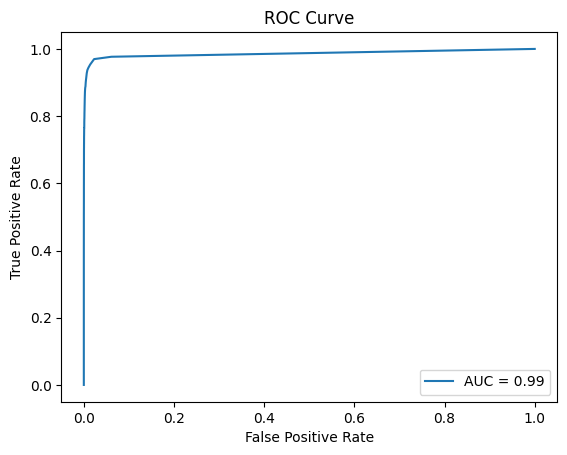

In [9]:

import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

AUC (area under curve) is around 0.99 ~ 1 that means the model performance is good. if AUC is 0.5 that means there is no discrimination but usually 0.8 to 0.9 considered a good performance

What is the difference between ROC and AUC?
AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability.

AUC can be computed using the trapezoidal rule. In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.


In [10]:
import joblib
import os

# save_dir = '../models'
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)
# short form of above code 
os.makedirs(os.path.join('..', 'models'), exist_ok=True)

# Define the path to save the model
model_path = os.path.join('..', 'models', 'random_forest_classifier.pkl')

# Save the model
joblib.dump(rf, model_path)

['../models/random_forest_classifier.pkl']